# Analysis of the Electric Vehicle Market Landscape

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("E:\DATASET\Electric_Vehicle_Population_Data.csv")

In [5]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [6]:
df.tail()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
177861,7SAYGDEE3N,Pierce,Bonney Lake,WA,98391.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,195224452,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
177862,KM8K23AG1P,Mason,Shelton,WA,98584.0,2023,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,35.0,228454180,POINT (-123.105305 47.211085),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304596e+10
177863,5YJYGDEE6M,Grant,Quincy,WA,98848.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,13.0,168797219,POINT (-119.8493873 47.2339933),PUD NO 2 OF GRANT COUNTY,5.302501e+10
177864,WVGKMPE27M,King,Black Diamond,WA,98010.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,182448801,POINT (-122.00451 47.312185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
177865,5YJ3E1EA8M,Pierce,Tacoma,WA,98422.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,27.0,211464683,POINT (-122.38578 47.28971),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305394e+10


So, this data is based on the EV population in the United States. Now, let’s clean the dataset before moving forward:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [9]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [10]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,177861.000000,177866.000000,177866.000000,177866.000000,177477.000000,1.778660e+05,1.778610e+05
mean,98172.453506,2020.515512,58.842162,1073.109363,29.127481,2.202313e+08,5.297672e+10
std,2442.450668,2.989384,91.981298,8358.624956,14.892169,7.584987e+07,1.578047e+09
min,1545.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,18.000000,1.814743e+08,5.303301e+10
50%,98122.000000,2022.000000,0.000000,0.000000,33.000000,2.282522e+08,5.303303e+10
75%,98370.000000,2023.000000,75.000000,0.000000,42.000000,2.548445e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [11]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [12]:
df.dropna()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177861,7SAYGDEE3N,Pierce,Bonney Lake,WA,98391.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,195224452,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
177862,KM8K23AG1P,Mason,Shelton,WA,98584.0,2023,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,35.0,228454180,POINT (-123.105305 47.211085),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304596e+10
177863,5YJYGDEE6M,Grant,Quincy,WA,98848.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,13.0,168797219,POINT (-119.8493873 47.2339933),PUD NO 2 OF GRANT COUNTY,5.302501e+10
177864,WVGKMPE27M,King,Black Diamond,WA,98010.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,182448801,POINT (-122.00451 47.312185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


## Understanding tha Data

### Data Columns:

**VIN (1-10):** Partial Vehicle Identification Number.  
**County:** The county in which the vehicle is registered.  
**City:** The city in which the vehicle is registered.  
**State:** The state in which the vehicle is registered. It appears that this dataset may be focused on Washington (WA) state.  
**Postal Code:** The postal code where the vehicle is registered.  
**Model Year:** The year of the vehicle model.  
**Make:** The manufacturer of the vehicle.  
**Model:** The model of the vehicle.  
**Electric Vehicle Type:** The type of electric vehicle, e.g., Battery Electric Vehicle (BEV).  
Clean Alternative Fuel Vehicle (CAFV) Eligibility: Eligibility status for clean alternative fuel vehicle programs.  
**Electric Range:** The maximum range of the vehicle on a single charge (in miles).  
**Base MSRP:** The Manufacturer’s Suggested Retail Price.  
**Legislative District:** The legislative district where the vehicle is registered.  
**DOL Vehicle ID:** Department of Licensing Vehicle Identification.  
**Vehicle Location:** Geographic coordinates of the vehicle location.  
**Electric Utility:** The electric utility service provider for the vehicle’s location.  
**2020 Census Tract:** The census tract for the vehicle’s location.  

**Ques 1-** "What is the trend of electric vehicle registrations over time?"

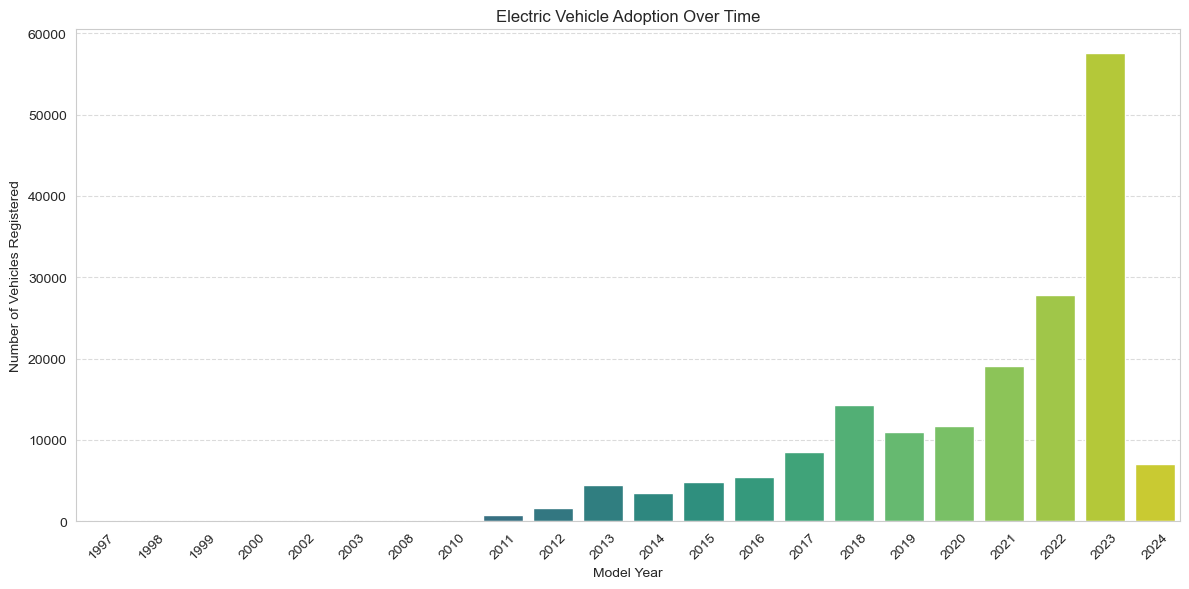

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Ensure 'Model Year' is a numerical data type (e.g., integer)
df['Model Year'] = pd.to_numeric(df['Model Year'], errors='coerce')  # Handles non-numeric values

# Filter out any potential missing values
ev_adoption_by_year = df[df['Model Year'].notna()]['Model Year'].value_counts().sort_index()

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="viridis")
plt.title('Electric Vehicle Adoption Over Time')  # More descriptive title
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add subtle gridlines for better readability
plt.tight_layout()
plt.show()

 **Solution-**  
 From the above bar chart, it’s clear that EV adoption has been increasing over time, especially noting a significant upward trend starting around 2016. The number of vehicles registered grows modestly up until that point and then begins to rise more rapidly from 2017 onwards. The year 2023 shows a particularly sharp increase in the number of registered EVs, with the bar for 2023 being the highest on the graph, indicating a peak in EV adoption.

**Ques 2-** "How does the distribution of electric vehicle registrations vary across different cities and counties?"

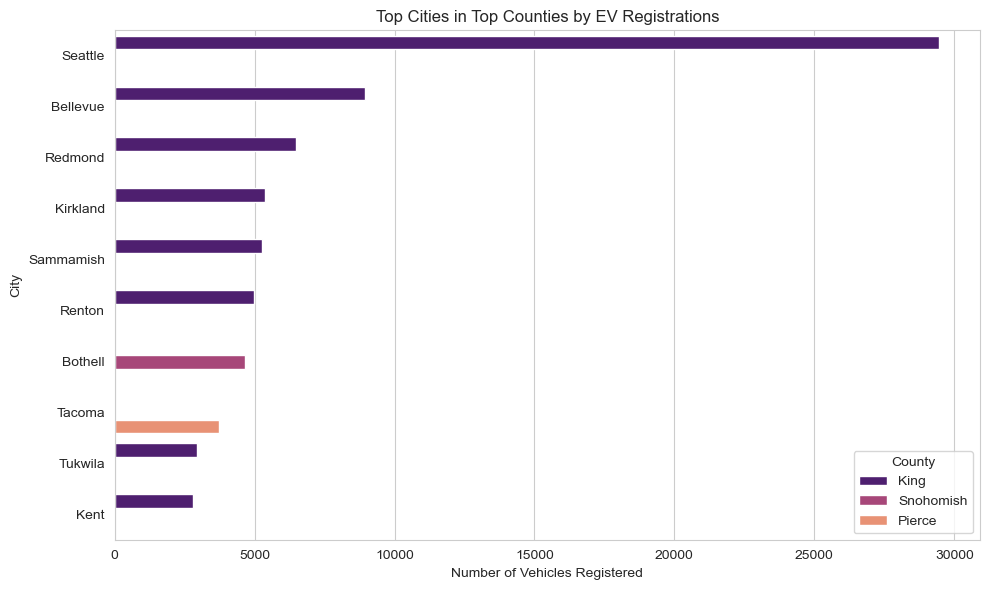

In [18]:
# geographical distribution at county level
ev_county_distribution = df['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

# filtering the dataset for these top counties
top_counties_data = df[df['County'].isin(top_counties)]

# analyzing the distribution of EVs within the cities of these top counties
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualize the top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="magma")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

**Solution-**   
The above graph compares the number of electric vehicles registered in various cities within three counties: King, Snohomish, and Pierce. The horizontal bars represent cities, and their length corresponds to the number of vehicles registered, colour-coded by county.   
Here are the key findings from the above graph:

* Seattle, which is in King County, has the highest number of EV registrations by a significant margin, far outpacing the other cities listed.
* Bellevue and Redmond, also in King County, follow Seattle with the next highest registrations, though these are considerably less than Seattle’s.
* Cities in Snohomish County, such as Kirkland and Sammamish, show moderate EV registrations.
* Tacoma and Tukwila, representing Pierce County, have the fewest EV registrations among the cities listed, with Tacoma slightly ahead of Tukwila.
* The majority of cities shown are from King County, which seems to dominate EV registrations among the three counties.
* Overall, the graph indicates that EV adoption is not uniform across the cities and is more concentrated in certain areas, particularly in King County.

**Ques 3-** "What is the distribution of electric vehicle types (BEV vs. PHEV) among the electric vehicles registered in the United States?"

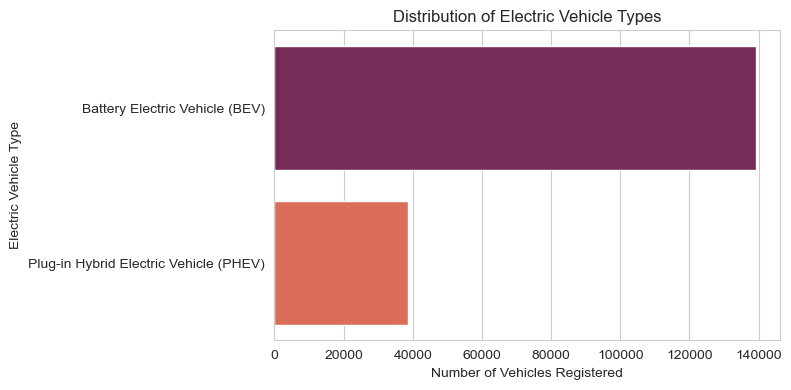

In [21]:
# analyzing the distribution of electric vehicle Types
ev_type_distribution = df['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(8, 4))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket")
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

**Solution-**   
The above graph shows that BEVs are more popular or preferred over PHEVs among the electric vehicles registered in the United States.

**Ques 4-** "What are the top electric vehicle manufacturers in terms of the number of vehicles registered?"

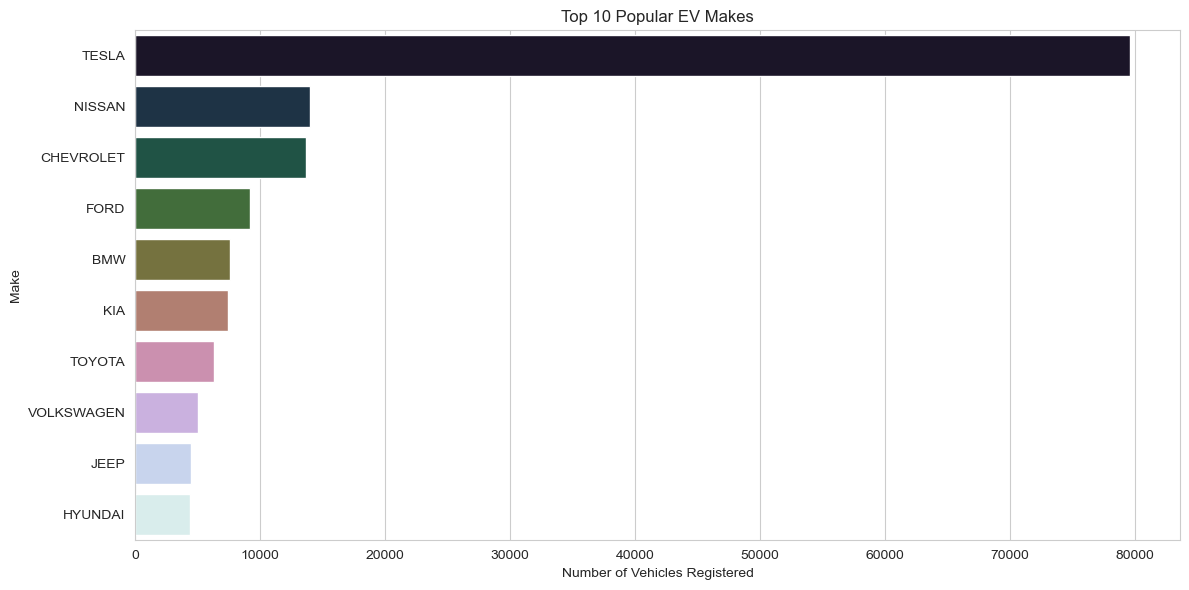

In [24]:
# analyzing the popularity of EV manufacturers
ev_make_distribution = df['Make'].value_counts().head(10)  # Limiting to top 10 for clarity

plt.figure(figsize=(12, 6))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix")
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

**Solution-**  
The above chart shows that:   
* TESLA leads by a substantial margin with the highest number of vehicles registered.
* NISSAN is the second most popular manufacturer, followed by CHEVROLET, though both have significantly fewer registrations than TESLA.
* FORD, BMW, KIA, TOYOTA, VOLKSWAGEN, JEEP, and HYUNDAI follow in decreasing order of the number of registered vehicles.

**Ques 5-** "What are the most popular electric vehicle models from the top three manufacturers (TESLA, NISSAN, and CHEVROLET)?"

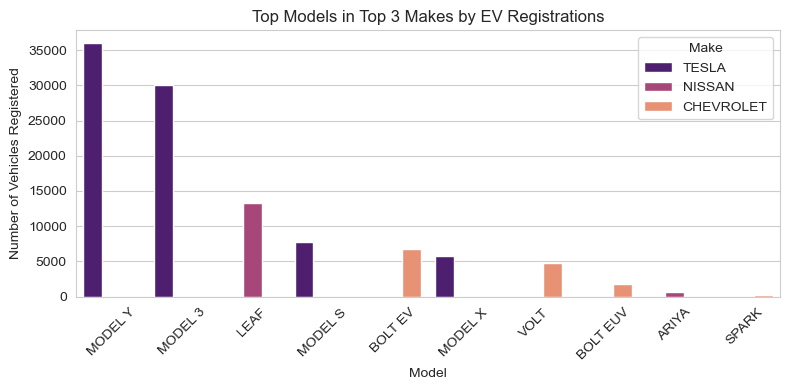

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
# Selecting top 3 manufacturers
top_3_makes = ev_make_distribution.head(3).index

# Filtering data for top manufacturers
top_makes_data = df[df['Make'].isin(top_3_makes)]

# Analyzing model popularity within top manufacturers
ev_model_distribution_top_makes = (
    top_makes_data.groupby(['Make', 'Model'])
    .size()  # Count occurrences of each combination
    .sort_values(ascending=False)  # Sort by count (descending)
    .reset_index(name='Number of Vehicles')  # Rename count column
)

# Visualizing top 10 models across these manufacturers

# Option 1: Stacked bar chart

top_models = ev_model_distribution_top_makes.head(10)
plt.figure(figsize=(8, 4))
sns.barplot(x='Model', y='Number of Vehicles', hue='Make', data=top_models, palette="magma")  # Stacked bars
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Model')  # Adjust label for stacked chart
plt.ylabel('Number of Vehicles Registered')
plt.legend(title='Make', loc='upper right')  # Adjust legend placement
plt.xticks(rotation=45)  # Rotate x-axis labels for readability (if using regular bar chart)
plt.tight_layout()
plt.show()

**Solution-**  
The above graph shows the distribution of electric vehicle registrations among different models from the top three manufacturers: TESLA, NISSAN, and CHEVROLET.  
Here are the findings:  
* TESLA’s MODEL Y and MODEL 3 are the most registered vehicles, with MODEL Y having the highest number of registrations.
* NISSAN’s LEAF is the third most registered model and the most registered non-TESLA vehicle.
* TESLA’s MODEL S and MODEL X also have a significant number of registrations.
* CHEVROLET’s BOLT EV and VOLT are the next in the ranking with considerable registrations, followed by BOLT EUV.
* NISSAN’s ARIYA and CHEVROLET’s SPARK have the least number of registrations among the models shown.  

**Ques 6-** "What is the distribution of electric vehicle ranges in the dataset?"

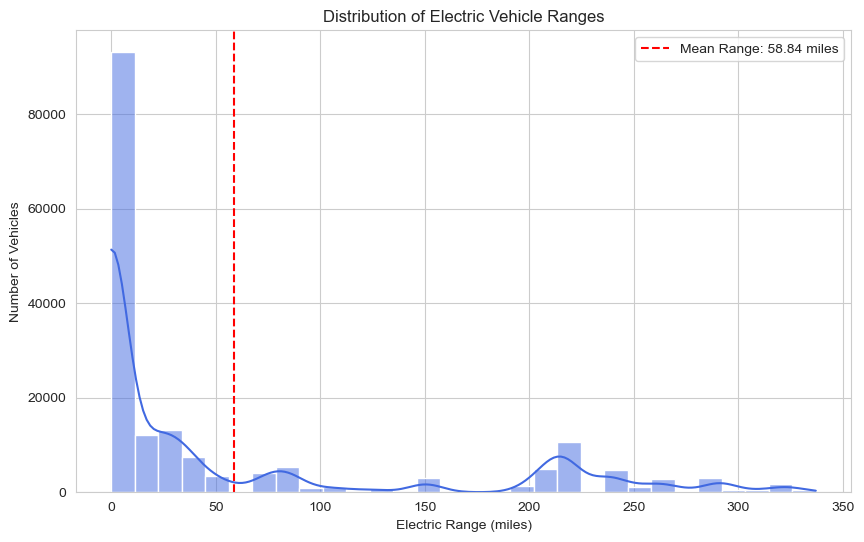

In [30]:
# analyzing the distribution of electric range
plt.figure(figsize=(10, 6))
sns.histplot(df['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(df['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {df["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

**Solution-**  
The above graph shows the mean electric range. Key observations from the graph include:  
* There is a high frequency of vehicles with a low electric range, with a significant peak occurring just before 50 miles.
* The distribution is skewed to the right, with a long tail extending towards higher ranges, although the number of vehicles with higher ranges is much less frequent.
* The mean electric range for this set of vehicles is marked at approximately 58.84 miles, which is relatively low compared to the highest ranges shown in the graph.
* Despite the presence of electric vehicles with ranges that extend up to around 350 miles, the majority of the vehicles have a range below the mean.
  
  It suggests that while there are EVs available with high electric ranges, the average range is skewed lower due to a substantial number of vehicles with shorter ranges.  


**Ques 7-** "How has the average electric range of vehicles progressed over time?"

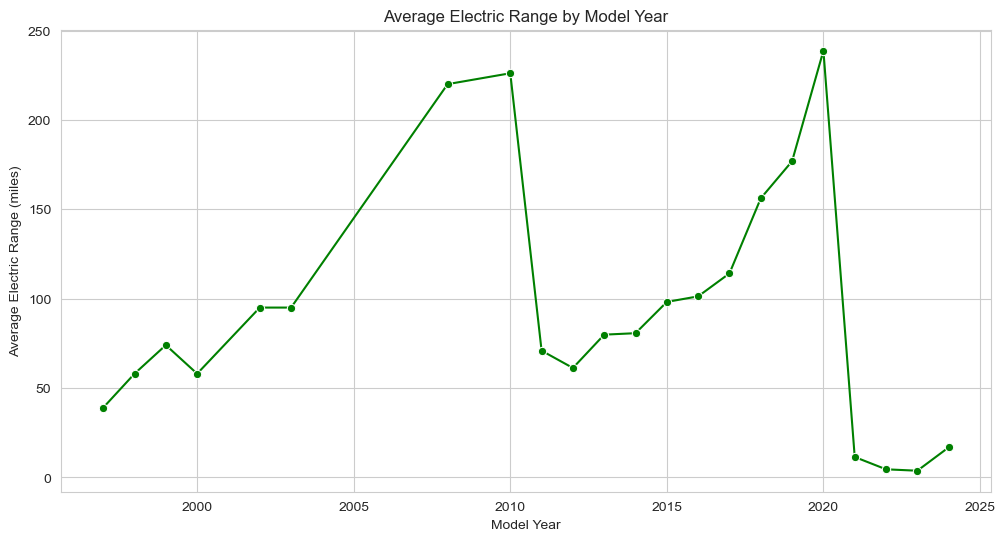

In [33]:
# calculating the average electric range by model year
average_range_by_year = df.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

**Solution-**  
The above graph shows the progression of the average electric range of vehicles from around the year 2000 to 2024. Key findings from the graph:  
* There is a general upward trend in the average electric range of EVs over the years, indicating improvements in technology and battery efficiency.
* There is a noticeable peak around the year 2020 when the average range reaches its highest point.
* Following 2020, there’s a significant drop in the average range, which could indicate that data for the following years might be incomplete or reflect the introduction of several lower-range models.
* After the sharp decline, there is a slight recovery in the average range in the most recent year shown on the graph.

  The data suggest that while there have been fluctuations, the overall trend over the last two decades has been toward increasing the electric range of EVs.  

**Ques 8-** "How do the average electric ranges of different electric vehicle models compare?"

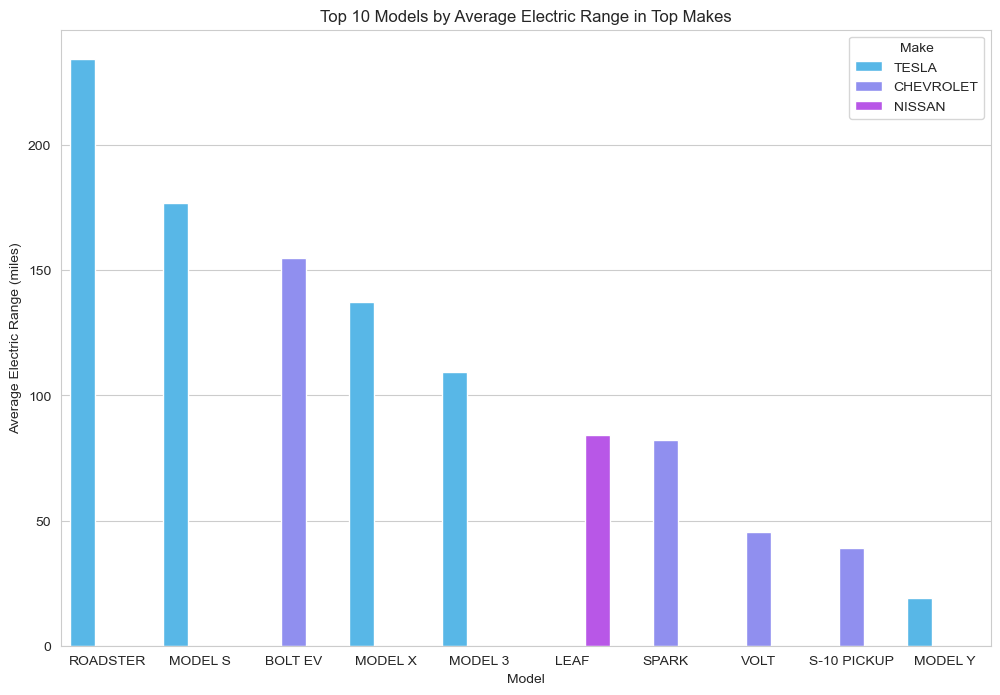

In [36]:
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

# the top 10 models with the highest average electric range
top_range_models = average_range_by_model.head(10)

plt.figure(figsize=(12, 8))
barplot = sns.barplot(y='Electric Range', x='Model', hue='Make', data=top_range_models, palette="cool")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.ylabel('Average Electric Range (miles)')
plt.xlabel('Model')
plt.legend(title='Make', loc='upper right')
plt.show()

**Solution-**   
The TESLA ROADSTER has the highest average electric range among the models listed. TESLA’s models (ROADSTER, MODEL S, MODEL X, and MODEL 3) occupy the majority of the top positions, indicating that on average, TESLA’s vehicles have higher electric ranges. The CHEVROLET BOLT EV is an outlier among the CHEVROLET models, having a substantially higher range than the VOLT and S-10 PICKUP from the same maker. NISSAN’s LEAF and CHEVROLET’s SPARK are in the lower half of the chart, suggesting more modest average ranges.

**Queas 9-** "How many electric vehicles are expected to be registered in 2024?"

In [39]:
# calculate the number of EVs registered each year
ev_registration_counts = df['Model Year'].value_counts().sort_index()
ev_registration_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       20
2010       23
2011      775
2012     1618
2013     4409
2014     3509
2015     4844
2016     5483
2017     8562
2018    14323
2019    10940
2020    11768
2021    19132
2022    27776
2023    57587
2024     7080
Name: count, dtype: int64

**Solution-**  
The dataset provides the number of electric vehicles registered each year from 1997 through 2024. However, the data for 2024 is incomplete as it only contains the data till March. Here’s a summary of EV registrations for recent years:  
* In 2021, there were 19,063 EVs registered.
* In 2022, the number increased to 27708 EVs.
* In 2023, a significant jump to 57,519 EVs was observed.
* For 2024, currently, 7,072 EVs are registered, which suggests partial data.

  To forecast the total number of EVs expected to be registered in 2024, we can use a growth rate based approach from previous complete years.

**Ques 10-** "What is the future outlook for the electric vehicle market based on the current trend of registrations and forecasts?"

In [42]:
from scipy.optimize import curve_fit
import numpy as np

# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{2024: 79092.26358070358, 2025: 119565.00850312428, 2026: 180748.2882793602, 2027: 273240.0066284026, 2028: 413061.179903938, 2029: 624431.02841697}


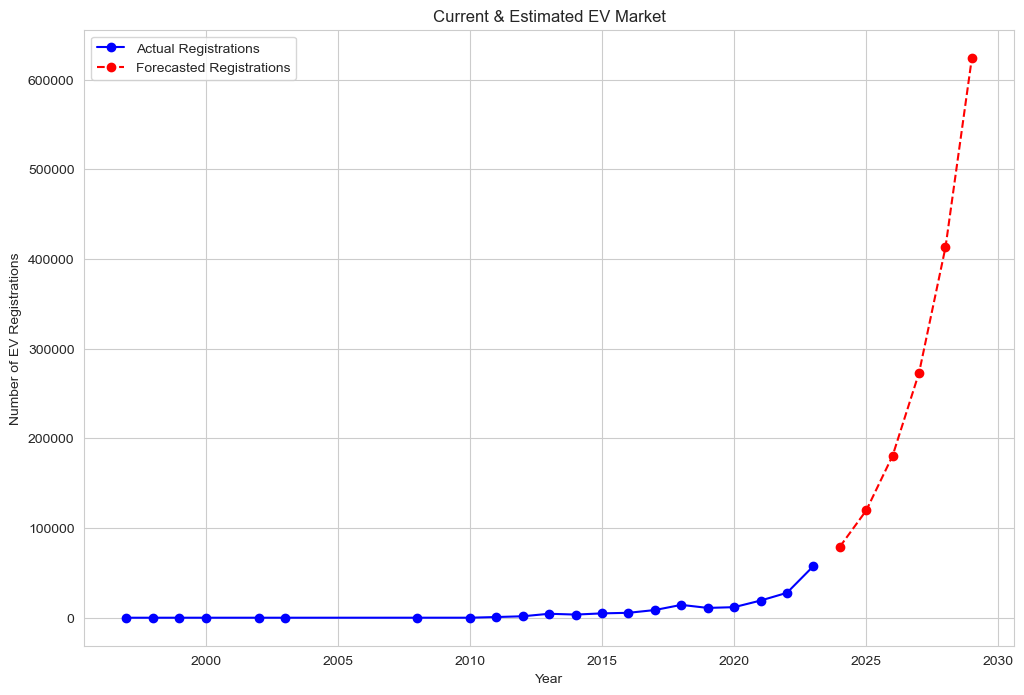

In [43]:
# prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()

**Solution-**  
From the above graph, we can see:   
* The number of actual EV registrations remained relatively low and stable until around 2010, after which there was a consistent and steep upward trend, suggesting a significant increase in EV adoption.
* The forecasted EV registrations predict an even more dramatic increase in the near future, with the number of registrations expected to rise sharply in the coming years.

  ***Given the growing trend in actual EV registrations and the projected acceleration as per the forecast data, we can conclude that the EV market size is expected to expand considerably. The steep increase in forecasted registrations suggests that consumer adoption of EVs is on the rise, and this trend is likely to continue. Overall, the data point towards a promising future for the EV industry, indicating a significant shift in consumer preferences and a potential increase in related investment and business opportunities.***